## NOmbre: Udeilor Ulises Uscategui Puentes

## Fecha: 23 de Febrero de 2026

## Machine Learning
## PREICA2601B010061

El proposito de esta actividad es aplicar los conocimientos adquiridos de regresion lineal, hallando el porcentaje de error del modelo, escogiendo las varables a estudiar y haciendo predicciones con el entrenamiento de un modelo lineal.

Se va a realizar una regresion lineal a datos de clientes de un ecommerce. Se comienza haciendo exploracion
de los datos y para ello se importa las librerias.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Ahora se importa la base de datos

In [2]:
data_ecommerce=pd.read_csv("Ecommerce Customers-1.csv")
df=pd.DataFrame(data_ecommerce)
print(df.head())

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

In [6]:
df = df.rename(columns={'Avg. Session Length': 'Avg_Session_Length', 
                       'Time on App': 'Time_on_App',
                       'Time on Website': 'Time_on_Website', 
                       'Length of Membership':'Length_of_Membership',
                         'Yearly Amount Spent':'Yearly_Amount_Spent'})
#se renombran las columnas.

Analisis explortorio de los datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Relacion entre las variables

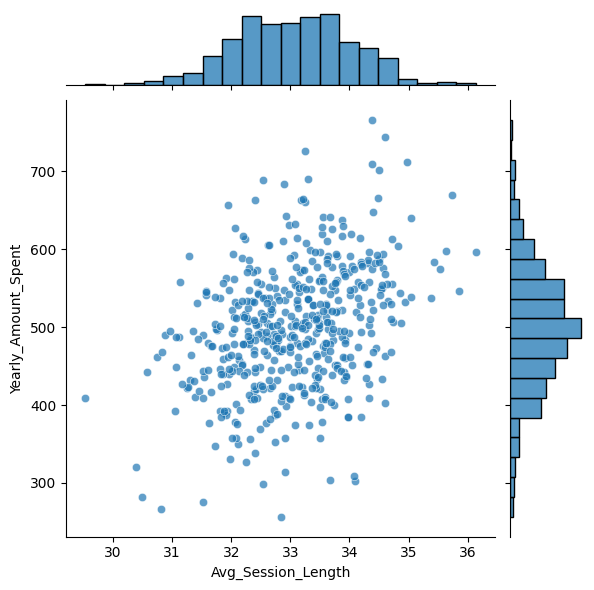

In [8]:
#relacion entre el promedio de tiempo de un usuario en la app y el valor anual gastado.
sns.jointplot(x=df.Avg_Session_Length , y=df.Yearly_Amount_Spent, alpha=0.7)

No se ve una relacion tan lineal. Ahora vamos a probar otra variable, en este caso el tiempo en la app

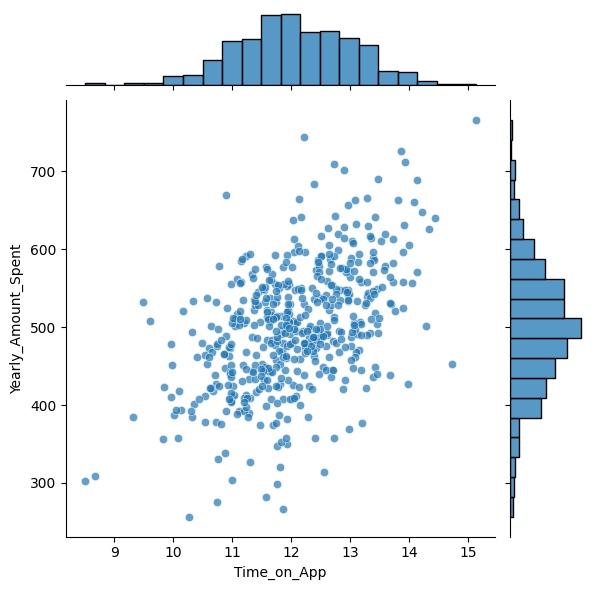

In [9]:
#relacion entre el promedio de tiempo de un usuario en la app y el valor anual gastado.
sns.jointplot(x=df.Time_on_App , y=df.Yearly_Amount_Spent, alpha=0.7)

Parece un poco mas lineal que la anterior pero de todas formas sera probar con la del tiempo del sitio web

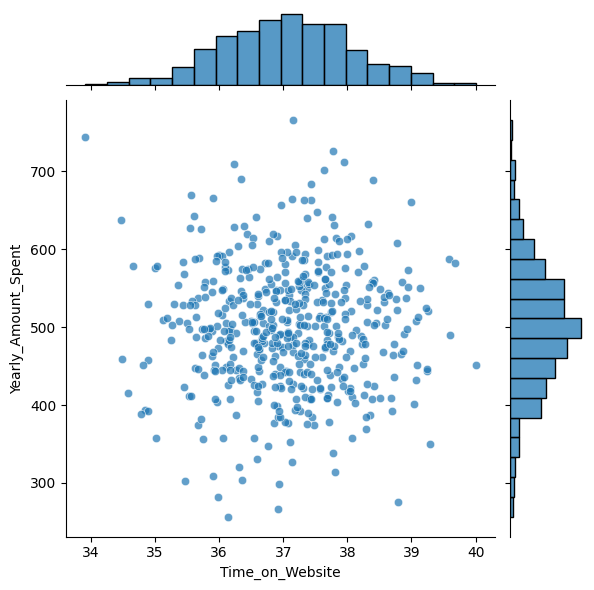

In [10]:
#relacion entre el promedio de tiempo de un usuario en la app y el valor anual gastado.
sns.jointplot(x=df.Time_on_Website, y=df.Yearly_Amount_Spent, alpha=0.7)

En este caso estan muy dispersos los puntos y no se ve una linea recta. Intentemos ahora con un grafico comparando los usuarios que llevan mas antiguedad con su proporcion de compras.

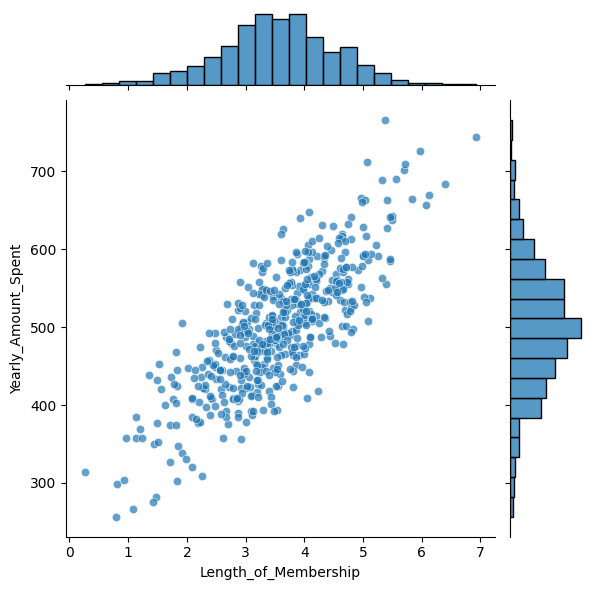

In [11]:
#relacion entre el promedio de tiempo de un usuario en la app y el valor anual gastado.
sns.jointplot(x=df.Length_of_Membership, y=df.Yearly_Amount_Spent, alpha=0.7)

Ahora comprmos todos los modelos

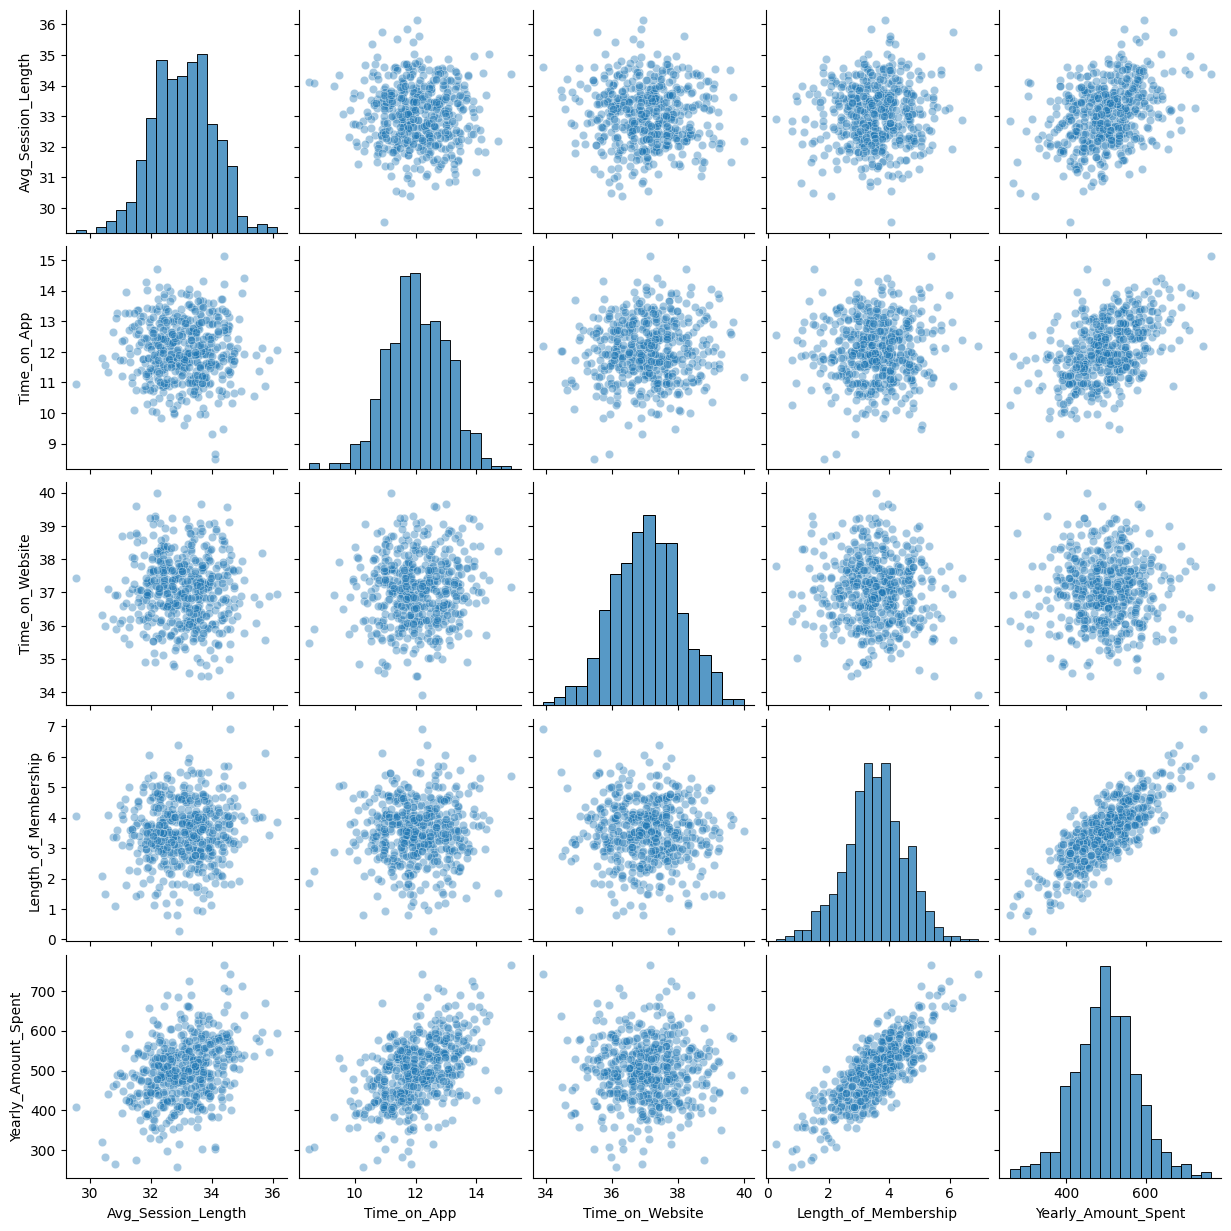

In [12]:
cdf = df[['Avg_Session_Length','Time_on_App', 'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent']]
sns.pairplot(data=cdf, kind='scatter', plot_kws={'alpha': 0.4})

## ¿Cuál variable independiente tiene mayor impacto en tu variable dependiente?

Como podemos ver la variable independiente que tiene mayor impacto tiene es el tiempo de membresia en el ecommerce en la variable dependiente "cantidad de años que lleva el usuario en el ecommerce". Por lo cual vamos deduciendo que lo que mas impacto tiene mas que el tiempo de visita es lograr fidelizaar a los usuarios.

## Aprendizaje predictivo de machine learning del modelo

Se seleccionan los datos del entrenamiento. En este caso en el eje X años en la aplicacion, y en el eje Y monto gastado anualmente.

In [16]:
from sklearn.model_selection import train_test_split

X = df[['Length_of_Membership']]
y = df[['Yearly_Amount_Spent']]
# Se toman datos de prueba de la aplicacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((400, 1), (100, 1))

Ahora se entrena el modelo lineal.

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_, lm.intercept_

(array([[64.64010065]]), array([271.3521128]))

Haciendo predicciones, e imprimiendolas

In [18]:
predictions = lm.predict(X_test)
predictions

array([[493.36239897],
       [520.31855413],
       [545.31600502],
       [461.48520003],
       [492.99396212],
       [515.23721032],
       [485.32056439],
       [519.19322598],
       [451.02061187],
       [518.66711703],
       [478.38181964],
       [437.25997065],
       [426.42887189],
       [555.55213423],
       [463.1107777 ],
       [451.30776963],
       [513.53096689],
       [469.30389796],
       [435.0236958 ],
       [515.80181189],
       [475.81469361],
       [494.17254457],
       [470.85326474],
       [581.25694008],
       [454.79704458],
       [532.13523835],
       [591.85482738],
       [528.26564599],
       [457.33621854],
       [399.14605254],
       [549.43359953],
       [499.7166409 ],
       [500.76216078],
       [323.16216962],
       [536.67019854],
       [478.63718851],
       [552.52222761],
       [439.56421366],
       [477.91768464],
       [492.07791614],
       [501.5494264 ],
       [359.43550249],
       [494.16768989],
       [505

Ahora a graficar los resultados.

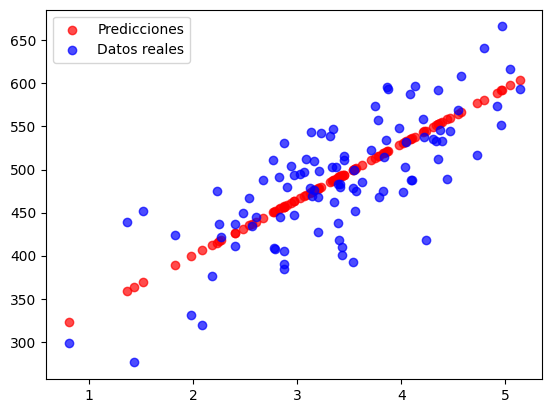

In [19]:
plt.scatter(X_test, predictions, color='red', alpha=0.7, label='Predicciones')
plt.scatter(X_test, y_test, color='blue', alpha=0.7, label='Datos reales')
plt.legend()

La linea en rojo es las predicciones que caculo el modelo para cada valor.

Finalmente se halla el margen de error. 

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = mse**0.5
r2 = r2_score(y_test, predictions)
# margen de error absoluto hallando el promedio de los errores.
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# margen de error mas exacto con el promedio de la suamatoria de cada valor al cuadrado y el promedio.
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 37.84
Mean Squared Error (MSE): 2162.11
Root Mean Squared Error (RMSE): 46.50
R-squared (R2): 0.56


Segun el MAE o error absoluto Medio mis resultados se desvian en 37.84 unidades.

Segun el MSE o error cuadratico medio, la diferencia entre las predicciones y los vlores reales es de 2162,11

Segun el RMSE (Raíz del Error Cuadrático Medio); la cual es una medida imilar al MAE, pero en las mismas unidades del valor gastado en el ecommerce, o sea dolares, en promedio, las predicciones se desvían de los valores reales en 46.50 unidades.

R-cuadrado (R2), es una medida que explica el error en terminos de porcentaje de varianza, por lo cual las predicciones poseen un 56% de varianza en la variable objetivo (dinero gastado en el ecommerce= dolares).

## Conclusiones

Los modelos de regresion lineal son una gran aproximacion a los datos de la realidad, en el caso en el que la relacion de las variables parecen una linea recta.

Siempre en estos tipos de modelos va a encontrarse un porcentaje de error, que es medible y del cual con python nos facilita mucho la labor matematica de hallar este error.

Si bien en este caso se pudo realizar el taller en un entorno local de computacion dado la poca cantidad de registros, en otros escenarios se deberia de manejar otros entornos que requieran mayor poder computacional, para entrenar un modelo, y la nube ofrece estos entornos a la perfeccion. De alli la importancia de conocer como importar una base de datos csv a entornos como google Colab.